# Multiple Linear Regression Project

## Bike sharing demand prediction


#### The goal of the project is to analyze give data set by the BoomBike, a Bike-sharing provider. The company wants to optimize their operations and maximise revenue, so we'll help them build a model to identify most essential variables from the given data set and accordingly create a business stratergy to optimize revenue  

### The primary goals of the client
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands  

### The project is divided into 4 segments
 - Data understanding and analysis
 - Visualisation
 - Data preparation
 - Model building and evaluation
 - Model Prediction

### Data understanding and analysis

#### Importing the essential libraries for the project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm  

import warnings
warnings.filterwarnings('ignore')

In [4]:
Bike_d = pd.read_csv("Bike_data.csv")

#### Data Quality Check

In [5]:
Bike_d.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
Bike_d.shape

(730, 16)

In [7]:
Bike_d.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
Bike_d.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
Bike_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Missing values' percentage in each column
round(100*(Bike_d.isnull().sum()/len(Bike_d)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Understanding Data dictionary & initial data preparation steps 

Manipulating some of the data for better readablility of the data for our model

In [11]:
# Using textual labels to represent seasons instead of numerical values.

# 1 = spring
Bike_d.loc[(Bike_d['season'] == 1) , 'season'] = 'spring'

# 2 = summer
Bike_d.loc[(Bike_d['season'] == 2) , 'season'] = 'summer'

# 3 = fall
Bike_d.loc[(Bike_d['season'] == 3) , 'season'] = 'fall'

# 4 = winter
Bike_d.loc[(Bike_d['season'] == 4) , 'season'] = 'winter'

In [12]:
# Evaluating the implementation of last step

Bike_d['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
# Evaluating year [yr : year (0: 2018, 1:2019)]

Bike_d['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
# Assigning string values to months for simplification
# A function has been created to map the actual numbers to categorical levels.

def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns

Bike_d[['mnth']] = Bike_d[['mnth']].apply(object_map)

In [15]:
# Checking holidays

Bike_d['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
# If a day is neither weekend nor holiday it takes the value 1, otherwise 0
Bike_d['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [17]:
# Evaluating last step

Bike_d['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [18]:
# Assigning string values to weekdays.
# A function has been created to map the actual numbers to categorical levels.

def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
Bike_d[['weekday']] = Bike_d[['weekday']].apply(str_map)

In [19]:
# Evaluating the last step

Bike_d['weekday'].astype('category').value_counts()

Thurs    105
Wed      105
Fri      104
Mon      104
Sat      104
Sun      104
Tues     104
Name: weekday, dtype: int64

In [20]:
# Replacing long weathersit names into string values for better readability

# 1 - Clear, Few clouds, Partly cloudy, Partly cloudy
Bike_d.loc[(Bike_d['weathersit'] == 1) , 'weathersit'] = 'A'

# 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
Bike_d.loc[(Bike_d['weathersit'] == 2) , 'weathersit'] = 'B'

# 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Bike_d.loc[(Bike_d['weathersit'] == 3) , 'weathersit'] = 'C'

# 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike_d.loc[(Bike_d['weathersit'] == 4) , 'weathersit'] = 'D'

In [21]:
# Evaluating weather situations present in the data
Bike_d['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [22]:
Bike_d['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

## Data Evaluation

 - Understanding distribution of various numeric variables
 - We'll identify multicollinearity
 - We'll also identify if some predictors directly have strong association with outcome variable

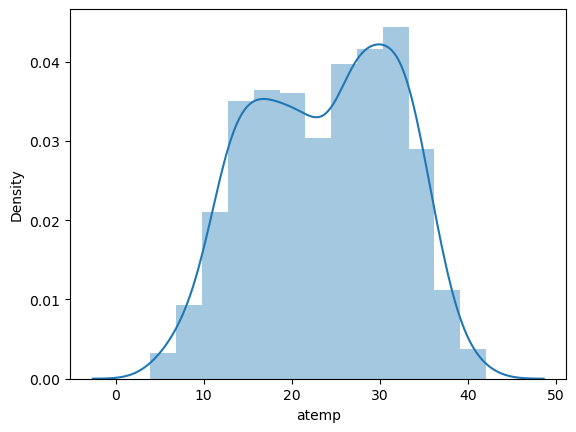

In [23]:
# feeling temperature
sns.distplot(Bike_d['atemp'])
plt.show()

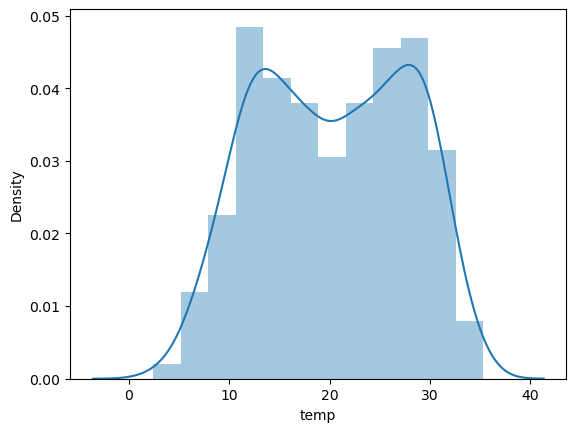

In [24]:
# temperature
sns.distplot(Bike_d['temp'])
plt.show()

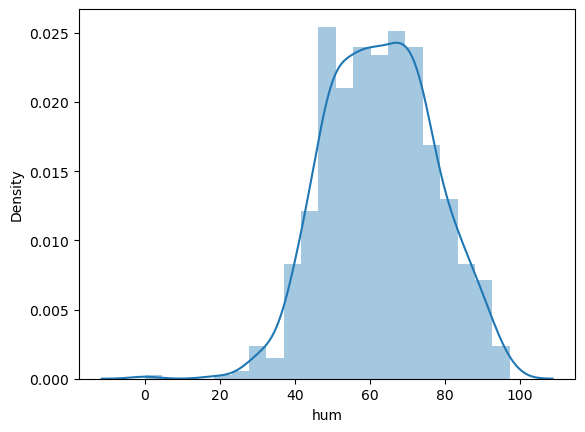

In [25]:
# humidity
sns.distplot(Bike_d['hum'])
plt.show()

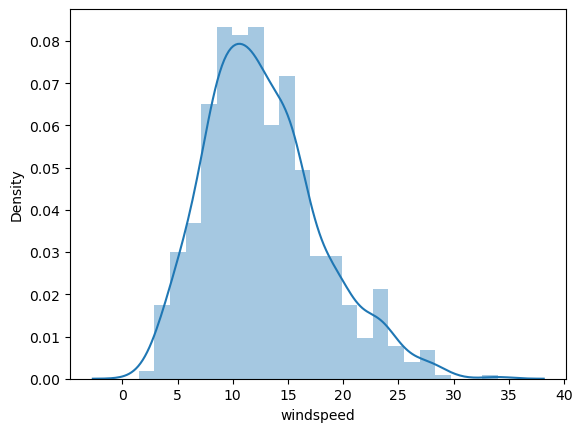

In [26]:
# wind speed
sns.distplot(Bike_d['windspeed'])
plt.show()

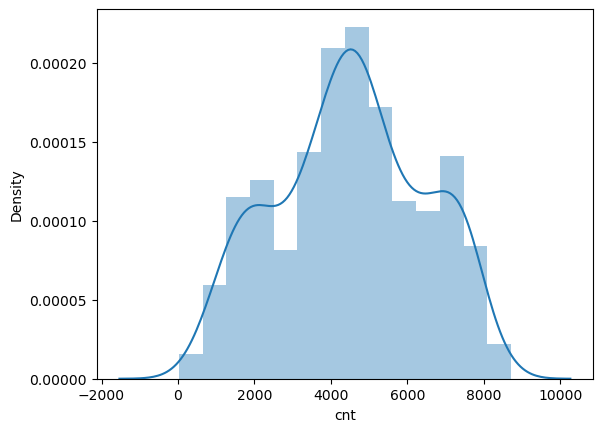

In [27]:
# Count of total rental bikes including casual and registered users
sns.distplot(Bike_d['cnt'])
plt.show()

In [28]:
# Converting date to datetime format

Bike_d['dteday']=Bike_d['dteday'].astype('datetime64')

In [29]:
# Converting categorical variables

Bike_d_categorical=Bike_d.select_dtypes(exclude=['float64','datetime64','int64'])
Bike_d_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [30]:
Bike_d_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


### Visualising Categorical Variables

There are few categorical variables as well. Let's make boxplot for these variables.

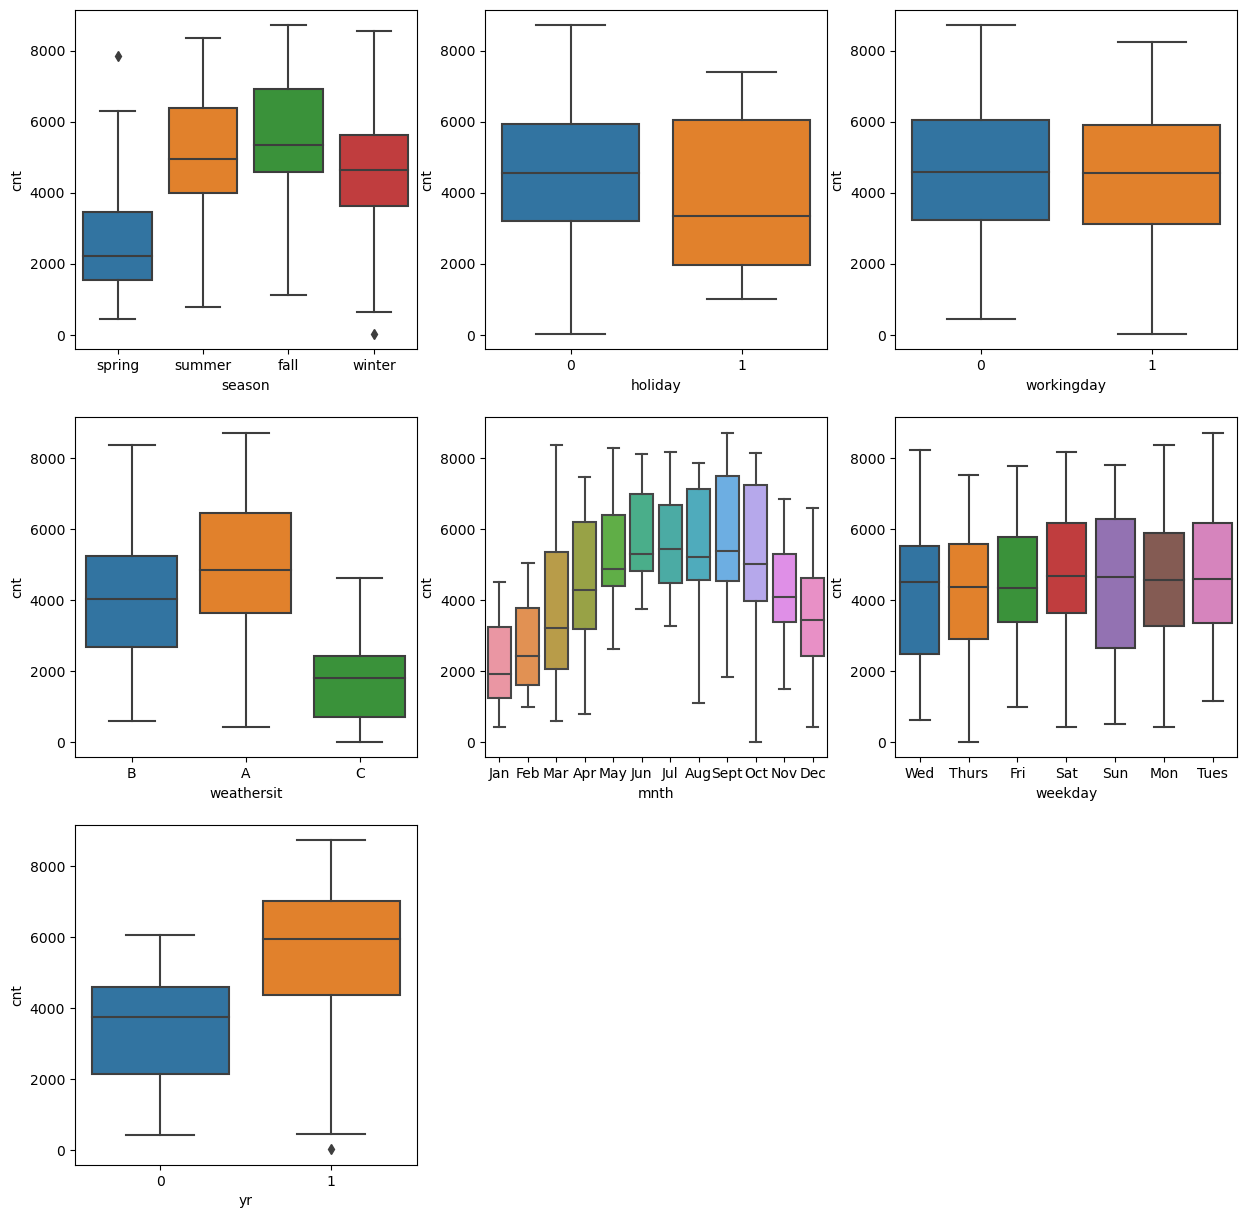

In [31]:
plt.figure(figsize=(15, 15))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_d)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_d)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_d)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_d)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_d)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_d)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_d)
plt.show()

### Visualising Numeric Variables

Now we'll make pairplot of all the numeric variables

In [32]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual", "registered", "cnt"]

for var in IntVariableList:
    Bike_d[var] = Bike_d[var].astype(float)

# Bike_d['casual'] = Bike_d['casual'].astype(float)
# Bike_d['registered'] = Bike_d['registered'].astype(float)
# Bike_d['cnt'] = Bike_d['cnt'].astype(float)

# Bike_d.head()

In [33]:
# All numeric variables
Bike_d_numeric = Bike_d.select_dtypes(include=['float64'])
Bike_d_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


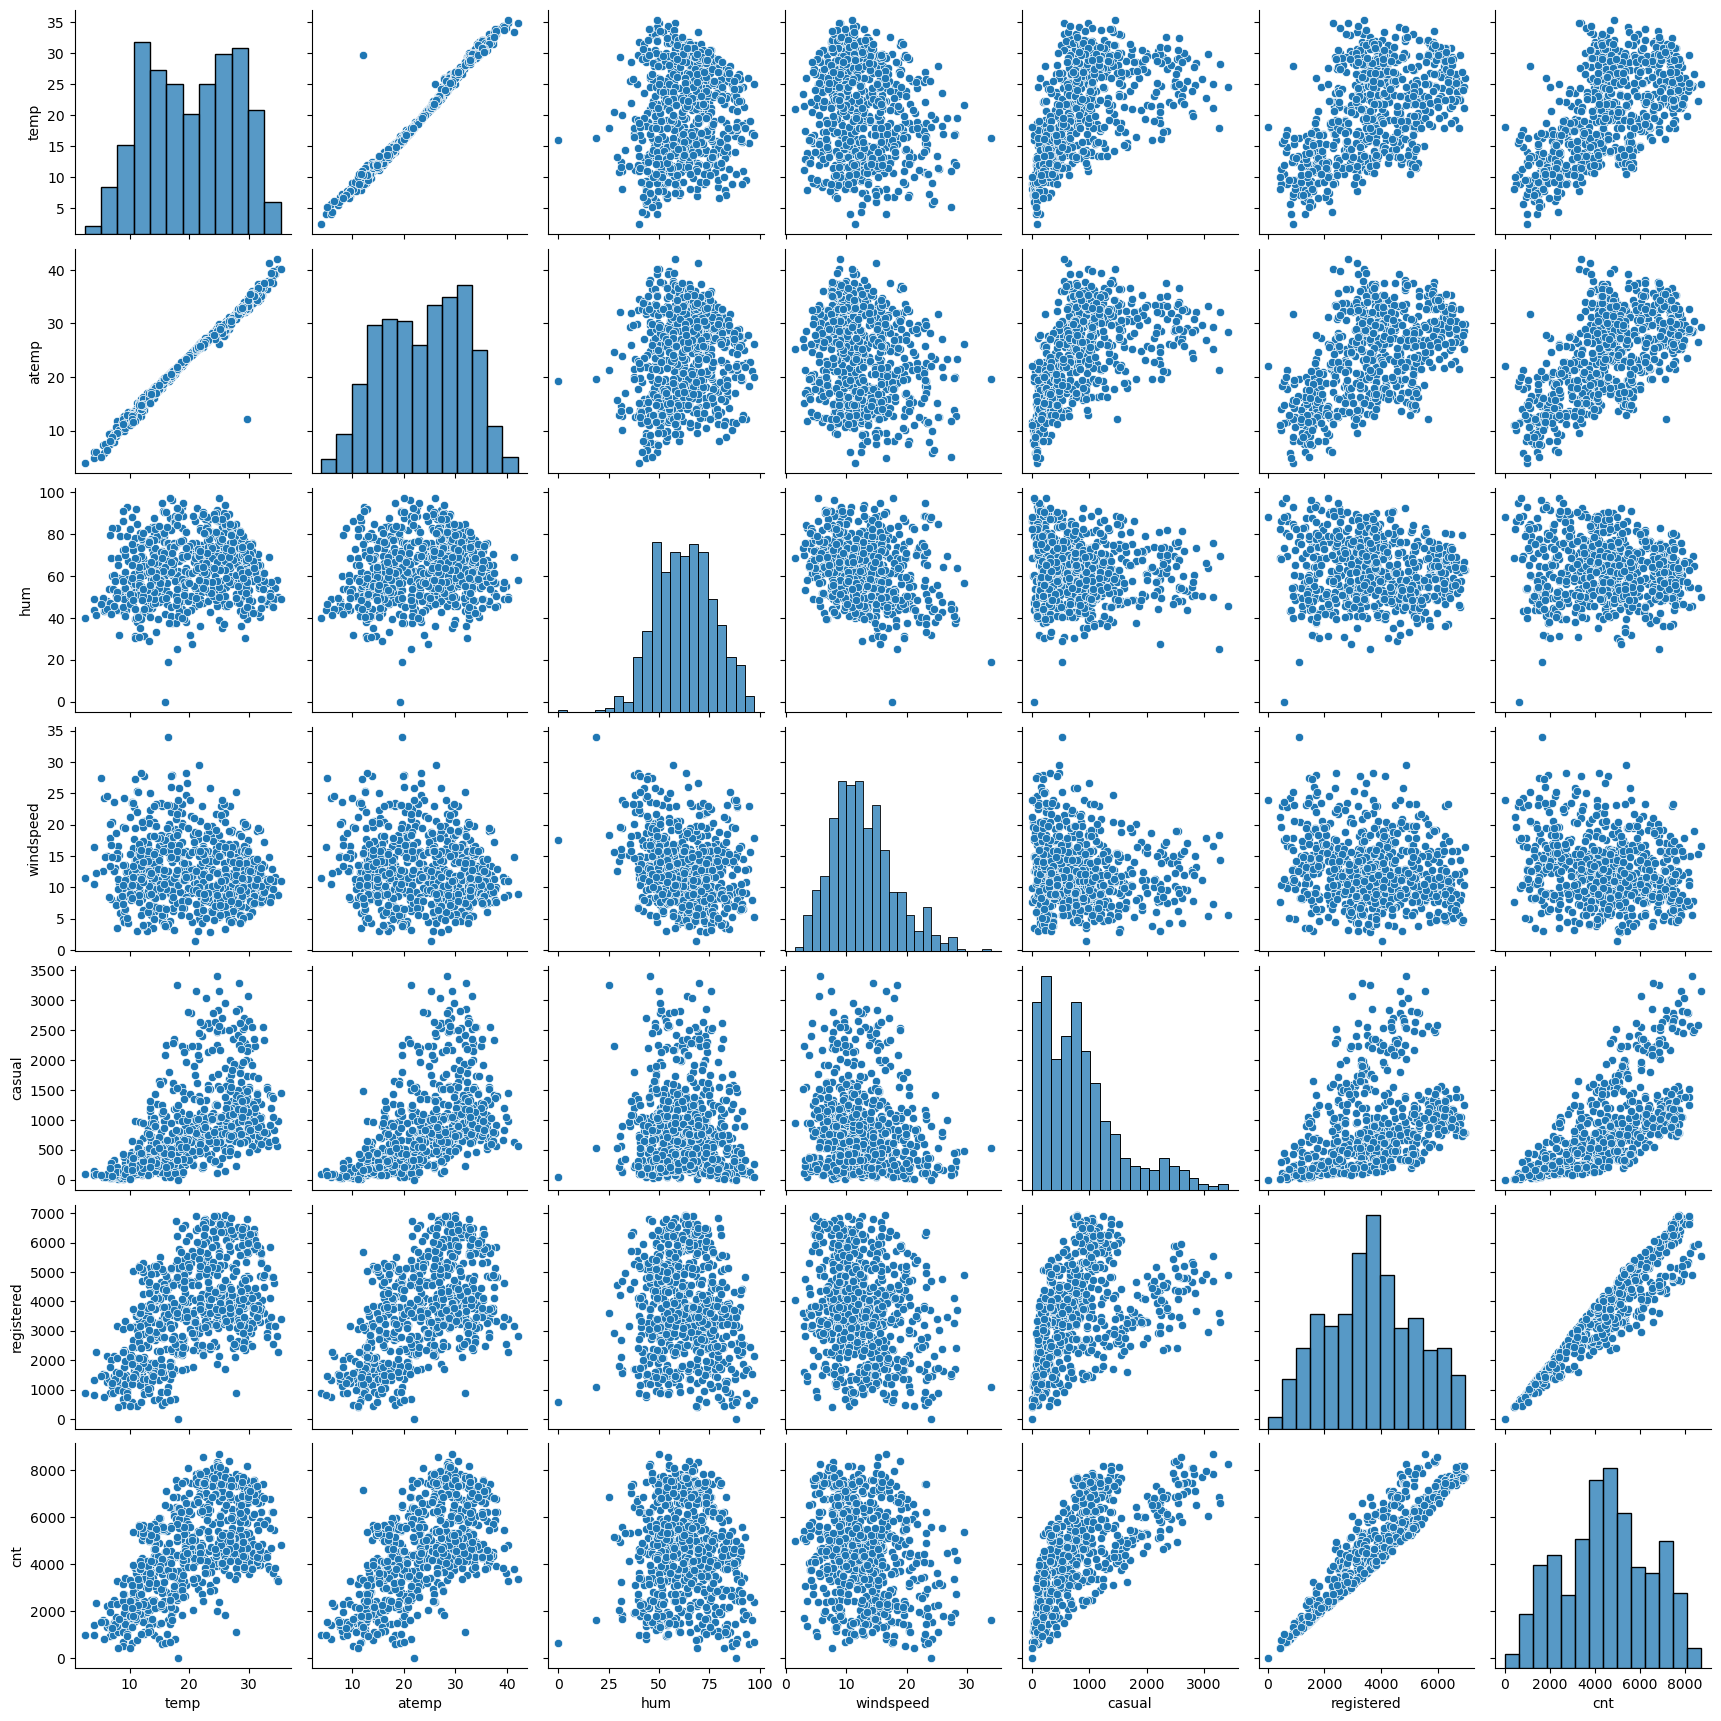

In [34]:
# Pairwise Scatter Plot
sns.pairplot(Bike_d_numeric)
plt.show()

#### We'll us correlation matrix to better understand the correaltion between th variables

In [35]:
# Correlation matrix
co_r = Bike_d_numeric.corr()
co_r

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


#### Now we'll plot the heatmap to visulise the correlation for better understanding

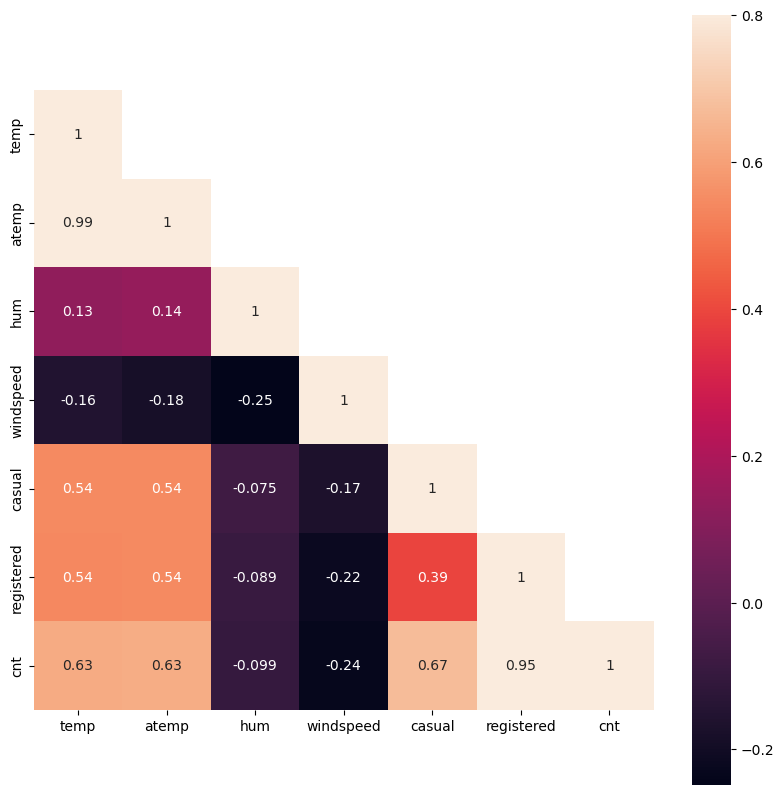

In [36]:
# heatmap
mask = np.triu(np.ones(co_r.shape), k=1)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(co_r, mask=mask, vmax=0.8, square=True, annot=True)
plt.show()

#### Here are some valuable insights from the heatmap

1) When examining the correlation of 'cnt' (count) with the independent variables:
  
  - 'cnt' exhibits a strong positive correlation with 'casual' and 'registered,' and it also displays a notable     positive correlation with 'atemp.' This strong positive relationship with 'registered' and 'casual' is easily explained, as they jointly represent the count.
  
  - 'cnt' is negatively correlated with 'windspeed' (approximately -0.24). This suggests that bike demand tends to be lower on windy days compared to regular days.
  
2) Regarding the correlation among the independent variables:

  - Some of the independent variables display high correlations (especially in the upper-left part of the matrix). Notably, 'atemp' and 'temp' exhibit a very high positive correlation, almost reaching a correlation coefficient of 1.
  - Consequently, when constructing the model, it's crucial to be mindful of multicollinearity.

In [37]:
# Removing atemp as it is highly correlated with temp

Bike_d.drop('atemp',axis=1,inplace=True) 

### Data Preparation

 - During the initial data exploration, we intentionally not included 'yr' (year), 'mnth' (month), 'holiday,' 'weekday,' and 'workingday' from the categorical variables to prevent excessive generation of dummy variables. These variables contain binary values, consisting of 0s and 1s, and these values hold specific and meaningful interpretations.

In [38]:
# Subset all categorical variables

Bike_d_categorical = Bike_d.select_dtypes(include=['object'])

In [39]:
Bike_d_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


#### Dummy Variables

 - We need to convert season,mnth,weekday and weathersit into integers, we'll use Dummy varibles for this step 

In [40]:
Bike_d_dummies = pd.get_dummies(Bike_d_categorical, drop_first=True)
Bike_d_dummies

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Drop categorical variable columns
Bike_d = Bike_d.drop(list(Bike_d_categorical.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
Bike_d = pd.concat([Bike_d, Bike_d_dummies], axis=1)

In [43]:
Bike_d

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,1,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,...,0,0,0,0,1,0,0,0,1,0
726,727,2019-12-28,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,...,0,0,1,0,0,0,0,0,1,0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,...,0,0,0,0,0,0,1,0,1,0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# Droping instant and dteday column as they of not useful

Bike_d = Bike_d.drop(['instant','dteday'], axis = 1, inplace = False)
Bike_d

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,1,...,0,0,0,0,1,0,0,0,1,0
726,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,1,...,0,0,1,0,0,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,1,0,0


##  Model Building & Evaluation

 - First, we'll split the data into train and test datasets, for evaluation of our prediction

In [45]:
np.random.seed(0)
df_train, df_test = train_test_split(Bike_d, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,0,0,0,0,1,1,0


### Scaling

After splitting the data, we need to normalize only the numeric variables using MinMaxScaler. This process ensures that all numeric variables are on the same scale, preventing some from dominating others during modeling. Importantly, scaling is applied only to the training dataset to avoid information leakage from the test data.

In [47]:
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all  columns except yes-no and dummy variables

var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [49]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,0,0,0,0,1,1,0


In [50]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


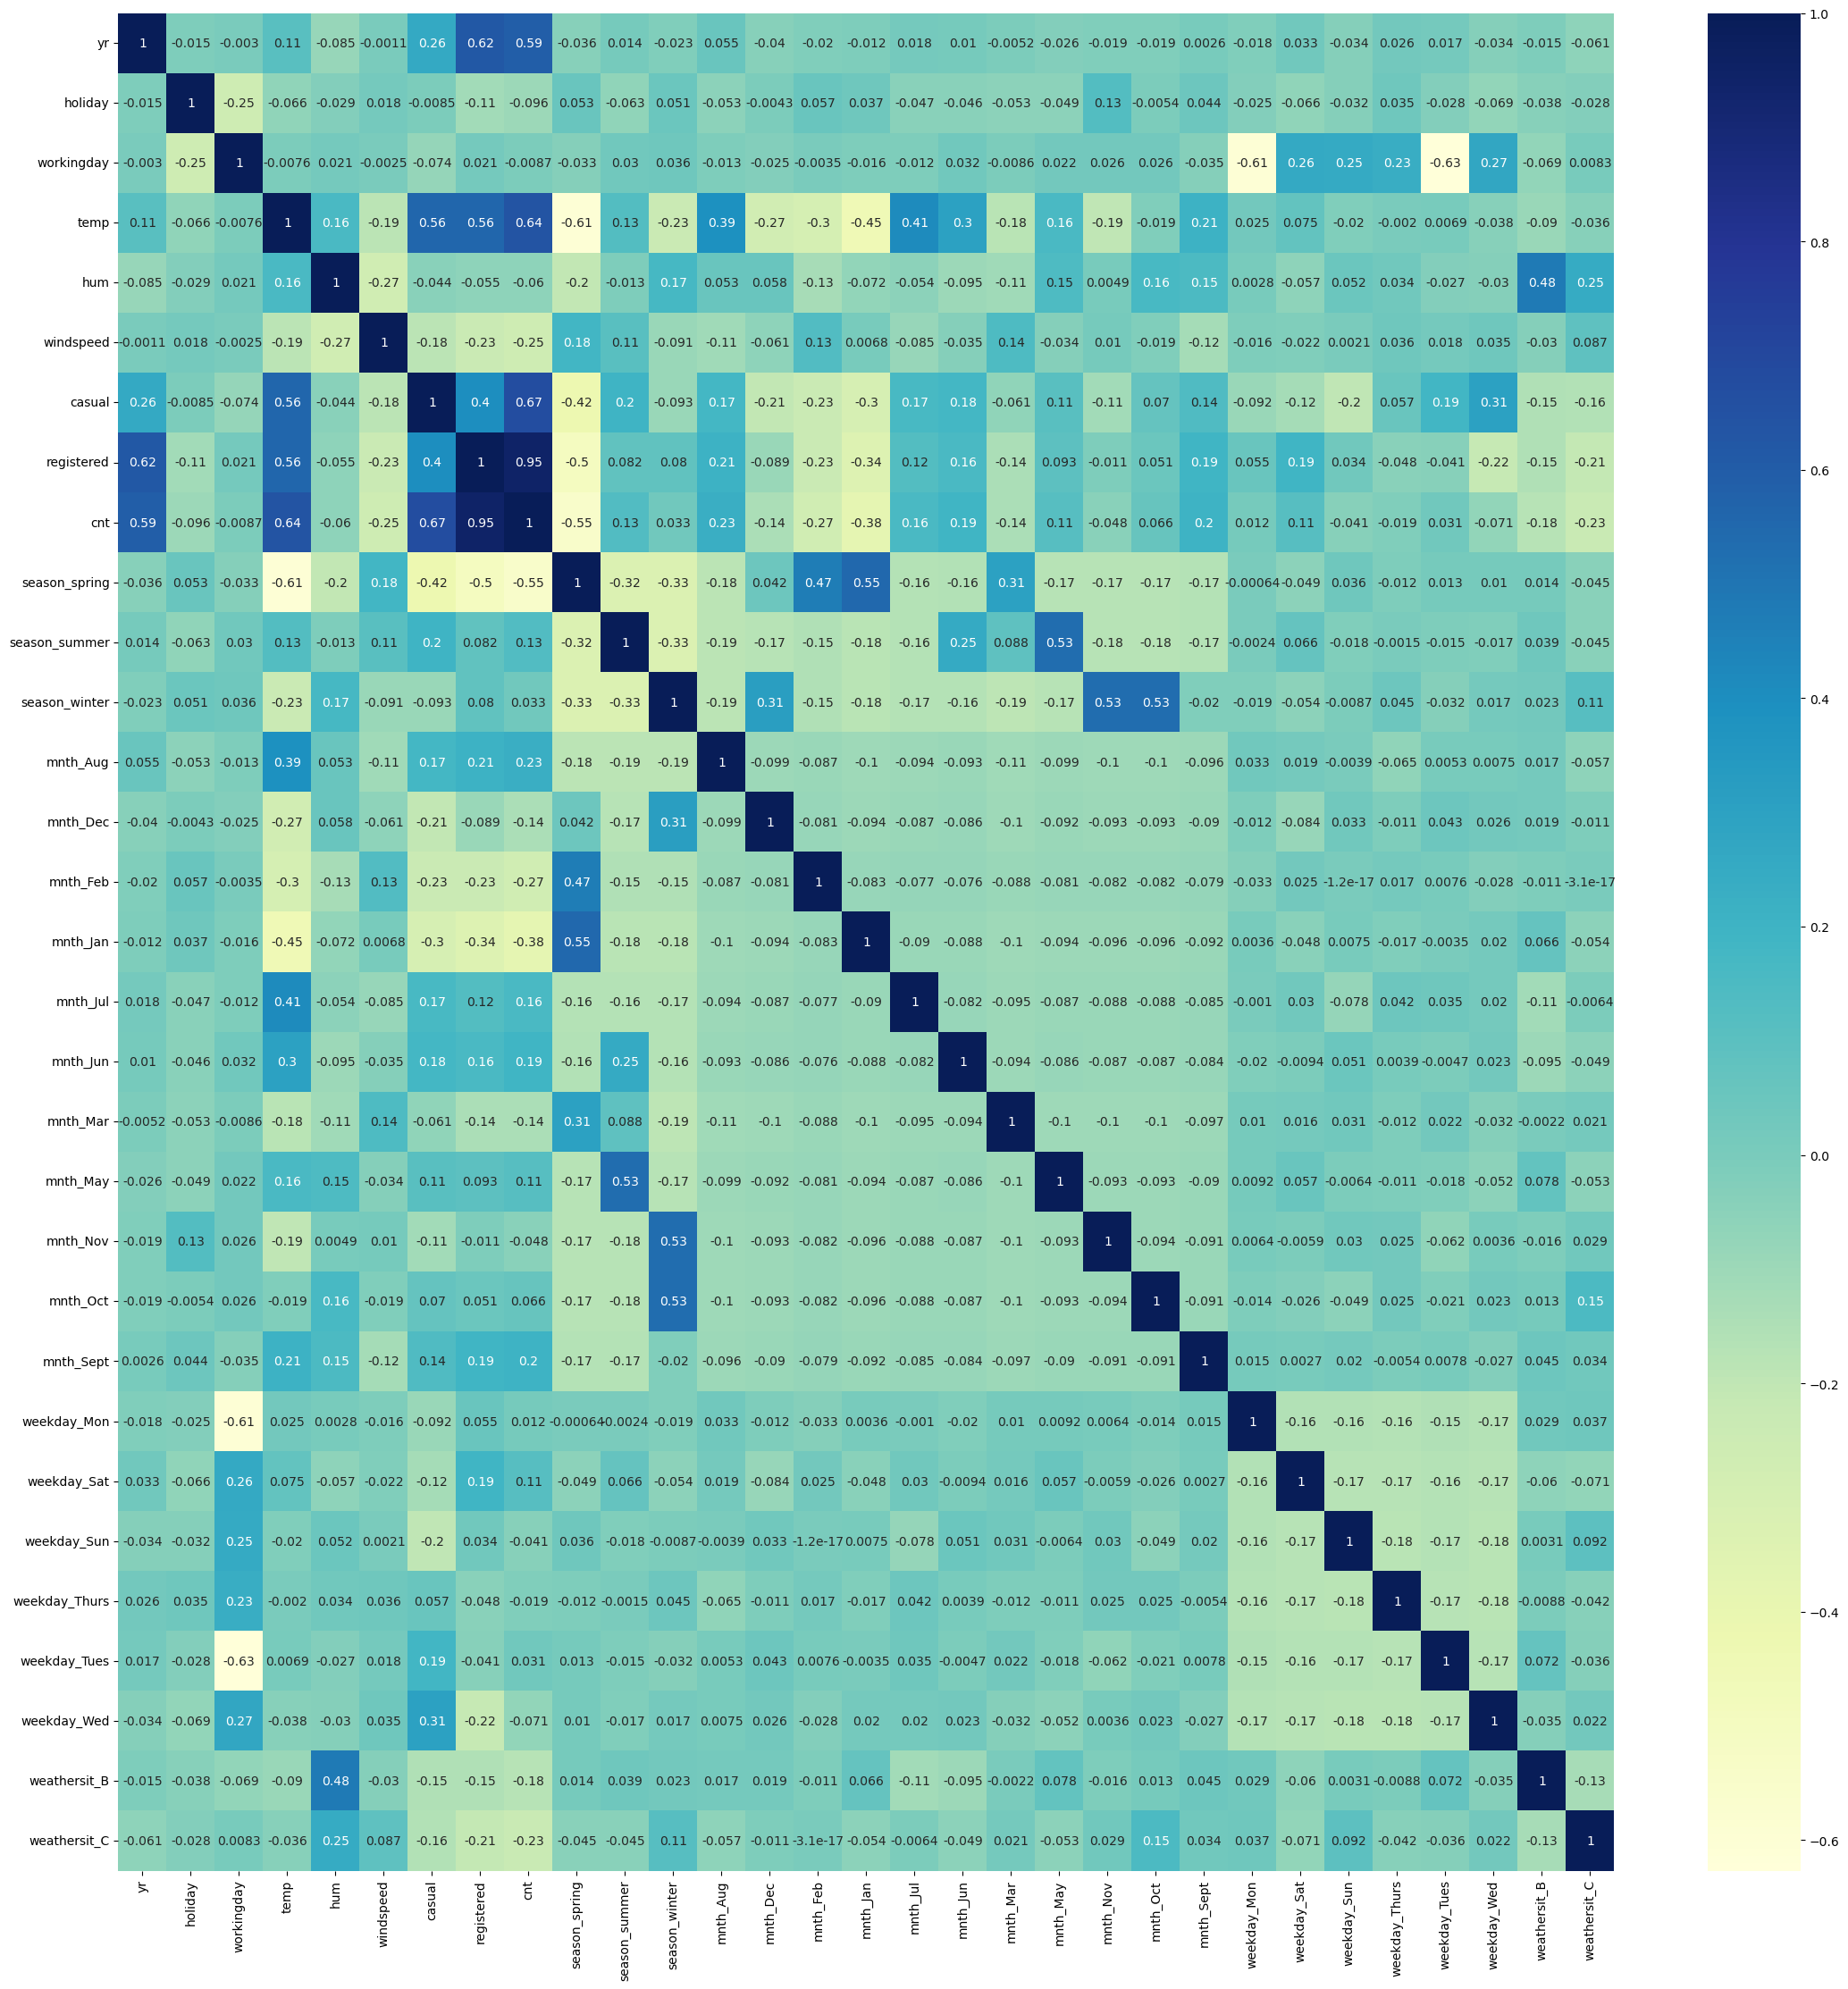

In [51]:
# Now let's check correlation coefficients
plt.figure(figsize = (27, 27))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

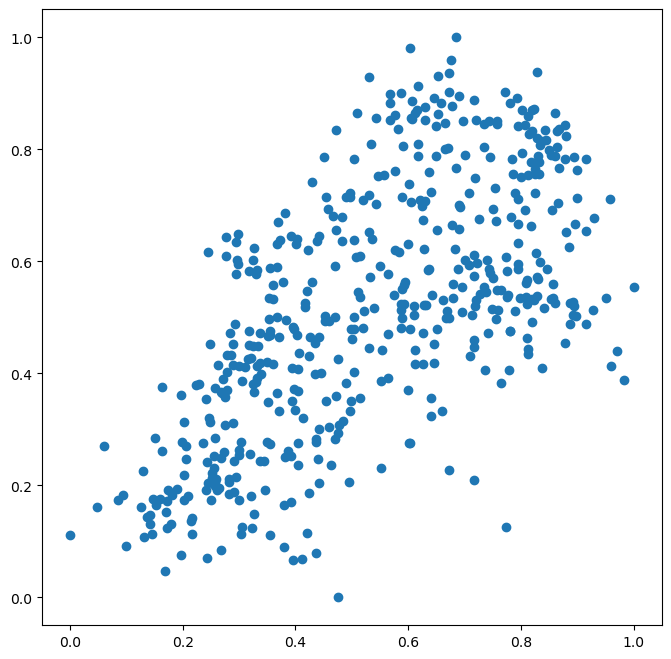

In [52]:
plt.figure(figsize=[8,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [53]:
# Dropping 'casual' and 'registered' as cnt is their sum

y_train = df_train.pop('cnt')
X_train = df_train.drop(["registered","casual"],axis=1) 

In [54]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [55]:
# Convert all the features into array before fitting model
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### Building first model

In [56]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.383302
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sept        0.086055
weekday_Mon     -0.045078
weekday_Sat      0.015104
weekday_Sun      0.011241
weekday_Thurs   -0.015058
weekday_Tues    -0.038721
weekday_Wed     -0.013392
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [57]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.04507831  0.01510409  0.01124081 -0.01505841
 -0.0387206  -0.01339217 -0.05935514 -0.25151085]
0.3833020433075012


In [59]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          4.33e-179
Time:                        04:47:57   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3833      0.084      4.558      0.000       0.218       0.549
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul         -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun          0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sept         0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0451      0.071     -0.637      0.524      -0.184       0.094
weekday_Sat       0.0151      0.015      0.980      0.327      -0.015       0.045
weekday_Sun       0.0112      0.015      0.736      0.462      -0.019       0.041
weekday_Thurs    -0.0151      0.015     -1.005      0.315      -0.045       0.014
weekday_Tues     -0.0387      0.071     -0.548      0.584      -0.178       0.100
weekday_Wed      -0.0134      0.015     -0.886      0.376      -0.043       0.016
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.0
================================================================

 - Our model has an Adjusted R-squared value of 84.5%, which is good, but p-values of some variables are high. So, we'll remove highly co-related variables from our model.

### Model Building Using RFE

We'll Create a model by employing recursive feature elimination to pick out relevant features. We'll commence with an initial set of features, which in this case, we'll arbitrarily set at 15. Next, we'll employ the statsmodels library to construct models using the chosen subset of features. This choice is made because statsmodels offers the advantage of Adjusted R-squared, a metric that scikit-learn lacks.

In [60]:
lm = LinearRegression()

# Create an RFE object with 15 features to select
rfe1 = RFE(estimator=lm, n_features_to_select=15) 

# Fit the RFE model on your training data
rfe1.fit(X_train, y_train)

# Print the boolean results indicating which features are selected
print(rfe1.support_)

# Print the ranking of each feature
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True  True False  True False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  3  1  1  1  1  1  1  9  1  2  1  1 13 14  6  1 12  1  4 10 11  7
  5  8  1  1]


In [61]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [62]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        04:47:57   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886      0.000       0.249       0.391
yr                0.2303      0.008     28.511      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp              0.4800      0.037     12.977      0.000       0.407       0.553
hum              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring    -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer     0.0408      0.015      2.659      0.008       0.011       0.071
season_winter     0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec         -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan         -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul         -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov         -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sept         0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_B     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_C     -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Our Adjusted R-squared has gone down from 84.5% to 84.1%. Now, we'll check for the multicollinearity among these variables.

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
a=X_train_rfe1.drop('const',axis=1)

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [66]:
# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7) 


# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2 11  1  1  1  1  6  3 17  9 10  7  1 21 22 14  8 20  4 12 18 19 15
 13 16  5  1]


In [67]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [68]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.34e-178
Time:                        04:47:57   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now, we'll check the VIF values

In [69]:
b=X_train_rfe2.drop('const',axis=1)

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


 - Based on the model summary provided, it appears that all the variables have p-values less than 0.05, suggesting significance from a p-value standpoint. However, it's important to observe that some variables have VIF values exceeding 5. Dealing with these specific variables requires caution.
 - So, as a first step, let's consider removing the variable 'hum,' which has the highest VIF, and then reassess the situation. Eliminating this variable might lead to changes in the VIF values of other variables that are also high.

In [71]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [72]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.37e-168
Time:                        04:47:57   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986      0.000       0.220       0.299
yr                0.2360      0.009     25.713      0.000       0.218       0.254
temp              0.4279      0.028     15.277      0.000       0.373       0.483
windspeed        -0.1524      0.028     -5.536      0.000      -0.206      -0.098
season_spring    -0.1413      0.014    -10.427      0.000      -0.168      -0.115
mnth_Jul         -0.0715      0.019     -3.769      0.000      -0.109      -0.034
weathersit_C     -0.2413      0.027     -8.873      0.000      -0.295      -0.188
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's check the VIF values

In [73]:
c=X_train_rfe2.drop('const',axis=1)

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


The VIF values and p-values are now in permissible range. But the Adjusted R-squared value has dropped from 84.5% with 28 variables to just 79.1% using 6 variables. This model is explaining most of the variance without being too complex. 

So, let's proceed with this model.

### Residual Analysis

Let's analyse, before we make predictions on test data set

In [75]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

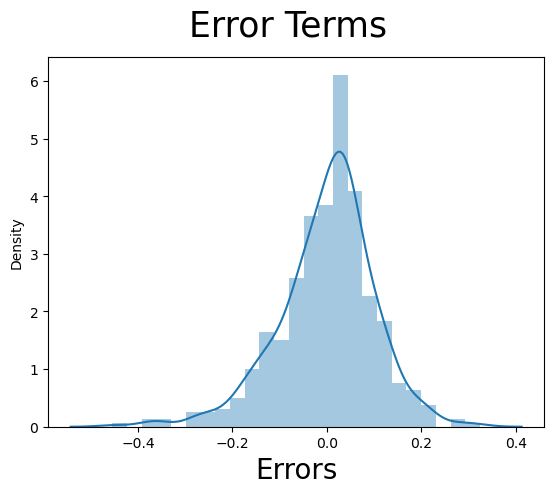

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 25)

# Plot heading
fig.suptitle('Error Terms', fontsize = 25)    

# Give the X-label
plt.xlabel('Errors', fontsize = 20) 

As residuals are normally distributed. we can proceed.

### Making Predeiction

We would first need to scale the test set

In [77]:
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [78]:
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [79]:
df_test[var] = scaler.transform(df_test[var])

In [80]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [81]:
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C'], dtype='object')

In [82]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [83]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_Jul       219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [84]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

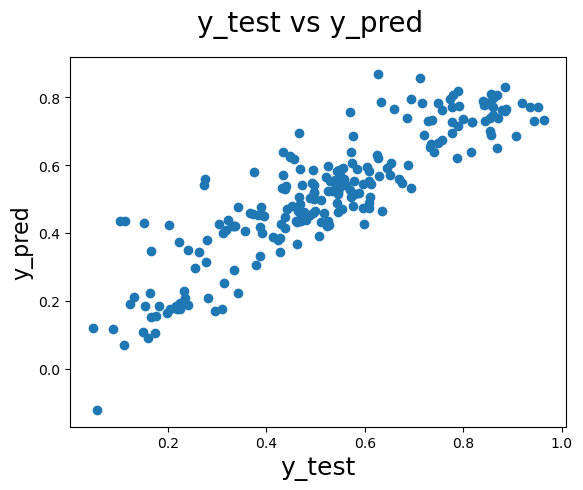

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

- Now let's check the R-squared and adjusted R-squared value 

In [86]:
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)  

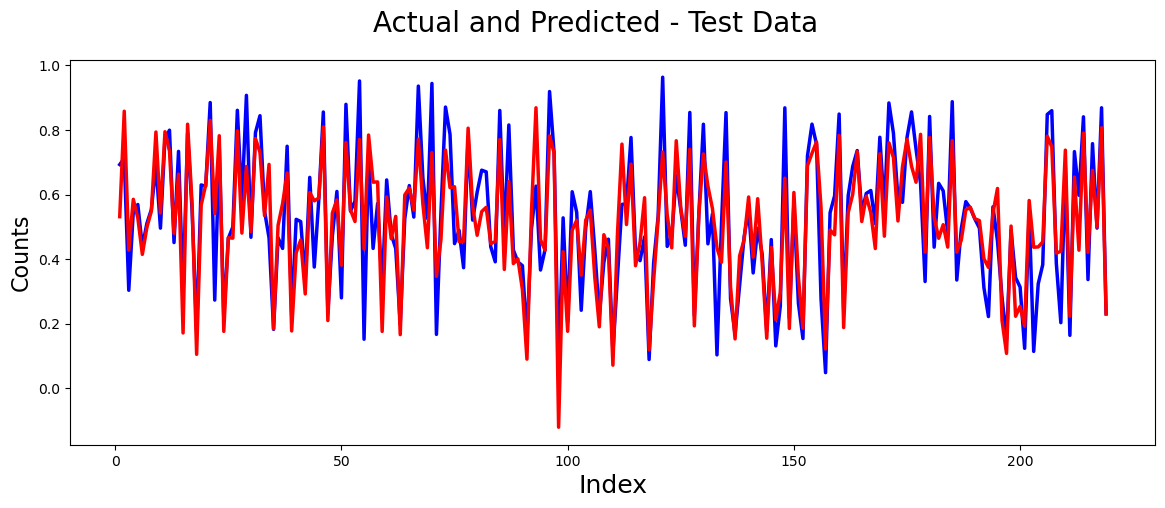

In [87]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

In [88]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228019

Hence, for our final model which has 6 variables the R-squared for training and test datasets are 79.3% and 78.02% respectively.

Cor-relation between final variables

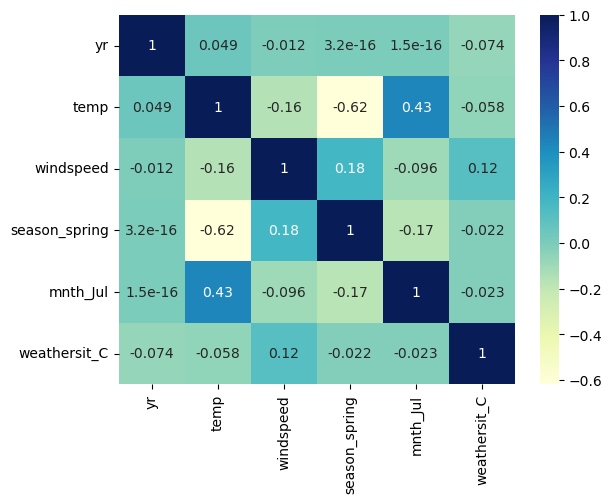

<Figure size 1200x900 with 0 Axes>

In [89]:
# Heatmap
sns.heatmap(Bike_d[col2].corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(12,9))
plt.show()

The co-relation of our final model which has 6 variables ('yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C') is very low. Hence, this is a very reliable model predict and bike rental sales. These variables can be used to predict bike demand. Can also help us boost our sales and generate maximum revenue.